In [68]:
import requests,re, pandas as pd, matplotlib.pyplot as plt
from bs4 import BeautifulSoup 


def read_in():
    
    with open('groupon.html') as gpon:
        #print(gpon.read())
    
        soup=BeautifulSoup(gpon.read(),'html.parser')
        
        return soup
  

In [69]:
def scrape():
    
    #pass in BS object
    soup=read_in()
        



    promos=soup.find_all('div', "cui-promotions")
  
    promolist=[]

 
    discounts=soup.find_all('div','cui-detail-badge cui-discount-badge')
    

    
    newpromolist=[]
    for item in discounts:
        promolist.append(item.text)
    index_var=-1
    
    
 
    letterlist=[]
    while index_var<5:
        index_var+=1
        #print(index_var)
        for item in promolist[index_var]:
            #print(item)
            letterlist.append(item)
       # index_var+=1
            #print(index_var)
   
    firstnum=0
    secnum=1

    dict1={}
    
    index_var=0
    indexvar=0
    places=soup.find_all('div','cui-udc-title one-line-truncate')
    namelist=[]
    for item in places:
        namelist.append(item.get_text(strip=True))
        dict1[namelist[index_var]]=promolist[indexvar]
        index_var+=1
        indexvar+=1
  
    
    return dict1

#scrape()


In [70]:
def get_data():
    
    #pass in dict
    dict1=scrape()
    
#c=re.compile(r'(\d+)(%)')
#print(type(c))
#num=c.search('47% OFF 75% 64')

#print(num.group(2))

    discountlist=[]

    for value in dict1.values():
    #match at least 1 occurence of a digit 
        nums=re.findall(r'\d{1,}', value)
        #print(nums)
    
#use comprehenstion to put discounts into a list (will be a list of lists)
    disclist=[re.findall(r'\d{1,}', value) for value in dict1.values()]

#flatten the list of lists into a single list of integers 
    singlelist=([int(i) for item in disclist for i in item])

    return singlelist



In [76]:
def visualize():
    
    #pass in dict 
    dict1=scrape()
    #pass in single list of nums
    discountlist=get_data()
    
    #plot 
    ax=plt.bar(dict1.keys(),discountlist)
    #rotate x ticks to avoid overlapping
    plt.xticks(rotation=50, ha='right')
    plt.title("Activities Discounts")
    plt.ylabel('% Discount')
    plt.xlabel('Establishment')
    plt.show()
    


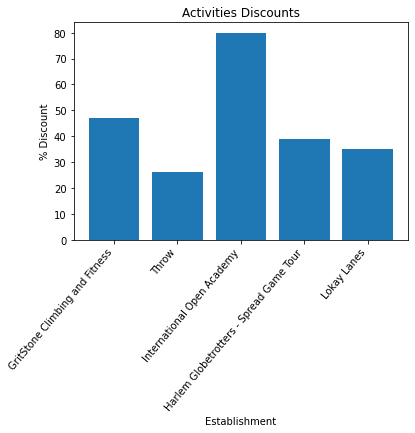

In [77]:
visualize()